## [1] 데이터준비
- fashion_mini 폴더를 tf의 하위돌더로 이동
- red_dress /  red_shoes / white_shorts


In [ ]:
######################
#### 데이터 파일 리스트 보기
#### GPT 검색 ' 파이썬 폴더내의 여러 폴더 모든 파일 갯수 출력'
#####################


In [ ]:
######################
#### 데이터 파일 샘플 보기, 사이즈(크기도 확인하고),  위의 파일갯수도 여기에서 확인해도 됨.
#### 이런명령어들은 추후 000.py로 저장하여서 import 하여서 다른 파일에서도 사용할수 있음.
#### GPT 검색 ' 하위폴더, 하위폴더의 샘플이미지 한개 plt.imshow로 출력, 사이즈도 출력'
#### 폴더가 fashion_mini /  red_dress  로 2개 하위폴더가 있음으
##################





# [2] 디렉토리에 있는 파일 불러오기
- 여기서부터는 제공된 아래 자료 코드 중 train과 val을 나누지 않고
- 코드에서 나누는것만 다름
- 2. 최종자료임_레이어층시각화_car_brand_classification_ResNet50.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

PATH = './fashion_mini'


In [2]:
# batchsize, image size 지정
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(PATH,
                                                            validation_split=0.2,  # 전체데이터의 20%를 val로
                                                            subset="training",     # 80%의 이름은 training로
                                                            seed=123,              # 같은 자료로 나눌수 있게 seed값 고정
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(PATH,
                                                                validation_split=0.2,  # 전체데이터의 20%를 val로
                                                                subset="validation",     # 80%의 이름은 validation 로
                                                                seed=123,              # 같은 자료로 나눌수 있게 seed값 고정
                                                                shuffle=True,
                                                                batch_size=BATCH_SIZE,
                                                                image_size=IMG_SIZE)

Found 1530 files belonging to 2 classes.
Using 1224 files for training.
Found 1530 files belonging to 2 classes.
Using 306 files for validation.


In [3]:
################################
### class_names는 이 코드에서는 사용할수 있지만 혹시 모델을 저장하고 새 파일에서 사용할때는
### 사용할수 없는 변수명임으로 필요하다면 class_name만 별도의 txt나 json파일로 저장해야함.
### class_name가 많다면
#####################################
class_names = train_dataset.class_names
class_names

['red_dress', 'white_shorts']

### [3] 작업세트 take 이해하기

In [ ]:
#########################################################
### 추가코드  (take에 대한 이해를 돕기위해)
### Found 1530 files belonging to 3 classes.
###  Using 1224 files for training. ====> 임으로
###  1224개의 train 자료를 32개씩 배치했음으로   38.25 임으로 총 39개의 세트가 생김
###                          32개*38개take=1216 개 데이터셋  + 마지막 39번째 take에는 8개의 데이터셋만 있음
### take(번호) 는 그 번호까지 값을 출력하는 기능이며 tensor은 텐서라는 특수한 타입으로 작업되어 있음. 파이토치 할때 다시 강의함.
#######################################################

for bun, (images, labels) in enumerate(train_dataset.take(48)):
  print(bun+1,'take:   ', labels)

1 take:    tf.Tensor([1 1 1 0 0 1 1 0 1 0 2 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0], shape=(32,), dtype=int32)
2 take:    tf.Tensor([1 0 2 0 1 1 1 1 0 1 2 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1], shape=(32,), dtype=int32)
3 take:    tf.Tensor([0 2 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 2 0 1 0 1 0 0 0 1 0 1 2 1 1 1], shape=(32,), dtype=int32)
4 take:    tf.Tensor([1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 2 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0], shape=(32,), dtype=int32)
5 take:    tf.Tensor([1 0 1 1 0 1 1 1 2 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 2 1 0], shape=(32,), dtype=int32)
6 take:    tf.Tensor([1 0 2 2 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 2 0 0], shape=(32,), dtype=int32)
7 take:    tf.Tensor([1 0 0 0 1 0 1 1 1 1 0 0 0 2 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0], shape=(32,), dtype=int32)
8 take:    tf.Tensor([0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0], shape=(32,), dtype=int32)
9 take:    tf.Tensor([0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1], 

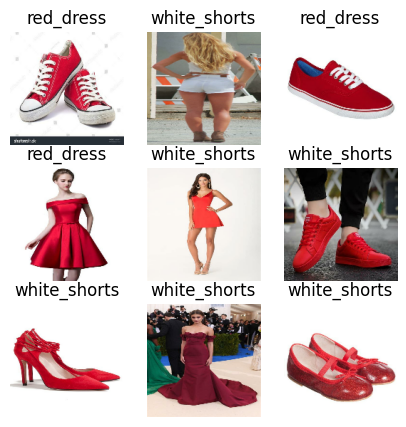

In [4]:
plt.figure(figsize=(5, 5))

for images, labels in train_dataset.take(1):
  for i in range(9):  # 9개의 이미지 출력
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))  # 이미지 표현을 위해 numpy 배열 dtype을 uint8로 지정
    plt.title(class_names[labels[i]])  # images에 해당하는 레이블 출력
    plt.axis("off")

### [4] 검증용데이터셋제작 및 Input/Outpu속도개선

In [5]:
##########################
## test dataset이 없었기 때문에 validation dataset에서 일정부분 가져와서 사용함
### 아래코드는 복사하여서
### gpt에게 '다음코드 해석해줘'
### 붙여넣기
#########################
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)   # // 는 몫함수로 15//5 는 3임
validation_dataset = validation_dataset.skip(val_batches // 5)


In [6]:
##########################
## 속도높이기
## gpt에게 코드해석 및  캐시메모리, 버퍼 개념 알기
###########################
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

### [5] 데이터증강

In [33]:
###############################################################
## 데이터 증강, 데이터증강은 이 외에도 다양한 기법을 적용할수 있으며
## 데이터 과적합시 증강에 대한 이슈가 커짐
## 지금은 'https://www.cubox.ai/board/blog/board_view.php?&page=1&num=625' 이 사이트만 대략 살펴보며
## 추후 구글검색 '데이터 증강 최신 논문' 으로 계속 살펴봐야함.
################################################################
# 데이터 증강 기법으로 좌우 반전, 회전, 명암 조절을 적용
##
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomContrast(0.3)
])

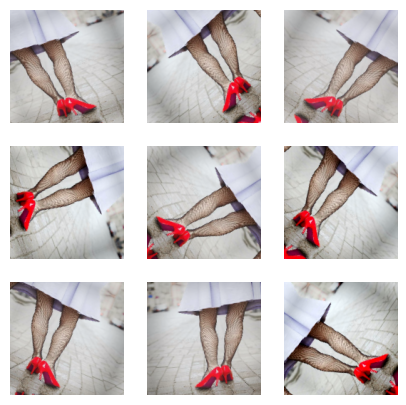

In [34]:
# augmentation 기법 적용 결과 확인
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(5,5))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    # tf.expand_dims를 통해 기존 이미지의 차원을 확장함 (first_image : 차원이 늘려질 배열, 0(axis) : 몇 번째 차원의 크기를 늘릴 것인지)
    # 차원 확장 후 이미지 증강 기법 적용
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

### [6] 전이학습 모델 사용
- 아래사이트는 먼저 대강 읽어보셔요
  - https://velog.io/@hipjaengyi_cat18/Image-Classification%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%B6%84%EB%A5%982-GoogLeNet-ResNet-%EB%82%B4%EA%B0%80%EB%B3%B4%EB%A0%A4%EA%B3%A0%EC%A0%95%EB%A6%AC%ED%95%9CAI

- 텐서플로우 resnet 모델 옵션값 확인(필수는 아님)
  - https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50


- 성능비교(대강읽고 또는 이 작업 다 끝난뒤 읽음)
  - https://dotiromoook.tistory.com/21

In [8]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model_2 = tf.keras.applications.resnet50.ResNet50(input_shape=IMG_SHAPE,
                                                    include_top=False,
                                                    weights='imagenet')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


In [9]:
base_model_2.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 160, 160, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 166, 166, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 80, 80, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 80, 80, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 80, 80, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 82, 82, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 40, 40, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 40, 40, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 40, 40, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 40, 40, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 40, 40, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 40, 40, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 40, 40, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 40, 40, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 40, 40, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

## [7] 모델 레이어별 출력물

In [22]:
##########################
### 샘플로 3개만
get_layer_name = [layer.name for layer in base_model_2.layers]
get_output = [layer.output for layer in base_model_2.layers]
len(get_output), get_output[:3]

(175,
 [<KerasTensor shape=(None, 160, 160, 3), dtype=float32, sparse=None, name=keras_tensor>,
  <KerasTensor shape=(None, 166, 166, 3), dtype=float32, sparse=False, name=keras_tensor_1>,
  <KerasTensor shape=(None, 80, 80, 64), dtype=float32, sparse=False, name=keras_tensor_2>])

In [23]:
##############
## 각 레이어 번호및 이름출력(샘플로 3개만)
######################
for i, j in enumerate(base_model_2.layers[:3]):
    print(i, j.name)

0 input_layer
1 conv1_pad
2 conv1_conv


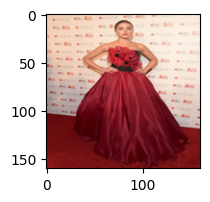

In [25]:
###############################
# 원본이미지보기
##########################
from PIL import Image
from glob import glob
plt.figure(figsize=(2,2))

# 파일명이 복잡하여 glog명령으로 파일을 가져오고자 함
# 잘 인식안될거 같은 이미지로 해보는것도 좋음

from PIL import Image
file=sorted(glob('./fashion_mini/red_dress/*.jpg'))[1]
img=Image.open(file).resize((160,160))
plt.imshow(img)
plt.show()

img=np.array(img)
newimg=np.reshape(img, (1,160,160,3))


In [26]:
################################
#### 위의원본파일이 전이학습 모델의 피처맵에서
###  어떻게 반응하는지를 보고자함
###  0값은 검정색임으로 반응하지 않으면 검정색, 반응하면 흰색으로 보임
#####################################
# 특정 범위 레이어들의 feature map 시각화
def check_feature(num_layer, input_img):
  ins = base_model_2.input
  outs = base_model_2.layers[num_layer].output
  feature_map = tf.keras.models.Model(ins, outs)
  feature = feature_map.predict(input_img)
  plt.figure(figsize=(10,4))

  for i in range(10):
    plt.subplot(1,10, i+1)
    plt.imshow(feature[0,:,:,i], cmap="gray")
  plt.show()

In [29]:
layCnt=len(get_output)
cntLayer=len(get_output)

- [low-level feature의 / high level feature 의 이해]
-  일반적으로 네트워크가 깊어(아래로 내려갈수록) 질수록 서로 다른 종류의 피처들을 학습한다고 알려져 있는데요 낮은 층(위에레이어) 에서 학습되는 피처를 low-level features, 깊은 층(아래레이어) 에서 학습되는 피처들은 high level features라고 부릅니다. low-level feature의 예로는 이미지의 색이나 경계(edge) 등을 말할 수 있고 high level features는 이보다 더 심화된 객체의 패턴이나 형태를 의미합니다.
- https://dacon.io/forum/405988

->10번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 0s 170ms/step


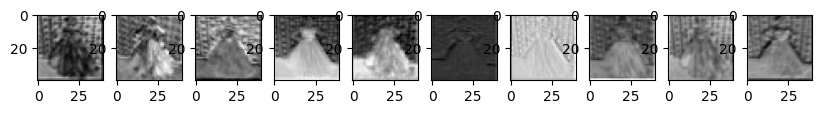

->11번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 0s 242ms/step


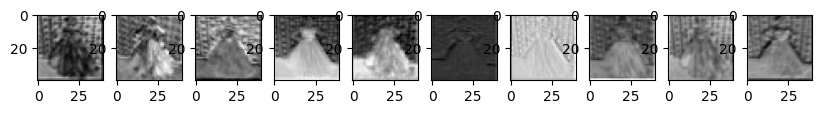

In [ ]:
### low-level feature feature Map보기
for i in range(10,12):  ## 90이상 레이어보면 이미지가 보이지 않음
  print('->{0}번째 layer를 통과하면 아래와같이 결과물 output됨'.format(i))
  check_feature(i, newimg)

->170번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


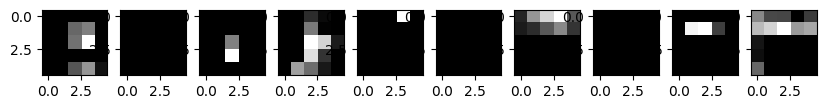

->171번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


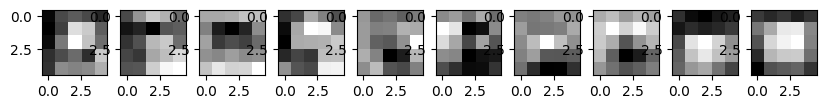

->172번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


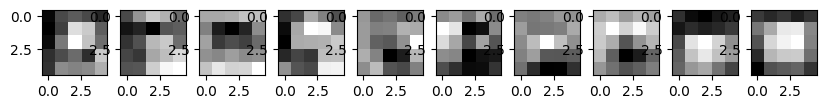

->173번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


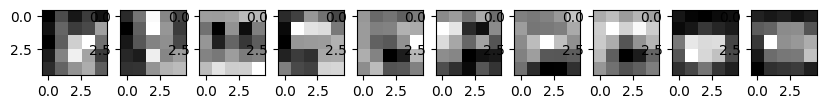

->174번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


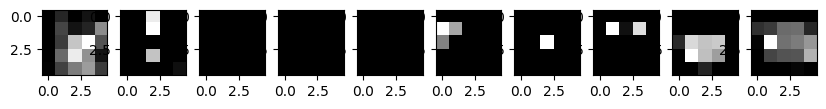

In [30]:
###  high level feature   feature Map보기
for i in range(170,175):  ## 170,175 레이어보면 이미지가 보이지 않음
  print('->{0}번째 layer를 통과하면 아래와같이 결과물 output됨'.format(i))
  check_feature(i, newimg)

->70번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 765ms/step


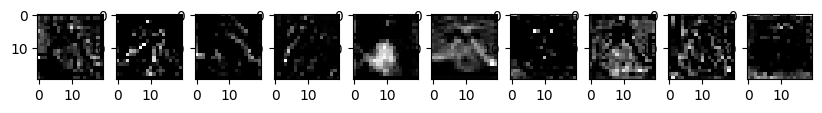

->71번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 536ms/step


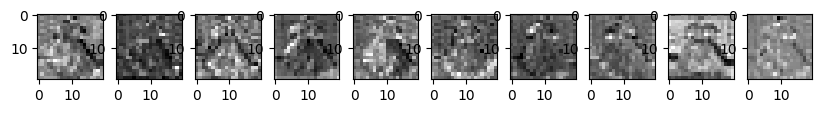

->72번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 786ms/step


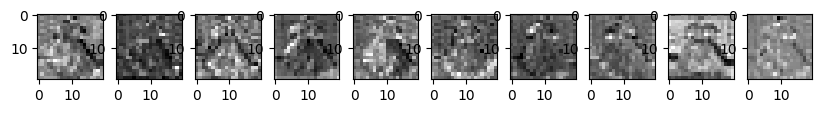

->73번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 819ms/step


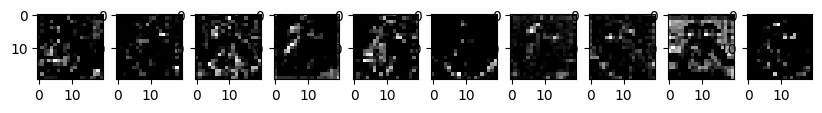

->74번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 814ms/step


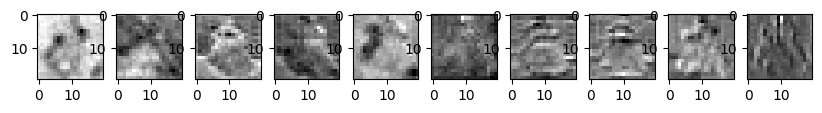

->75번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 549ms/step


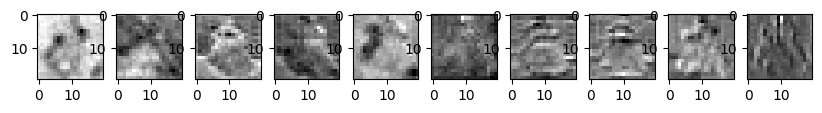

->76번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 526ms/step


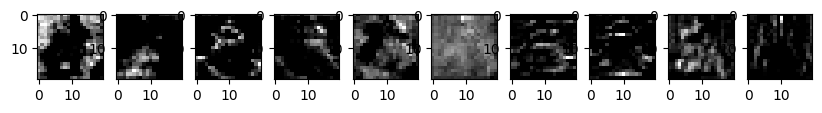

->77번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 564ms/step


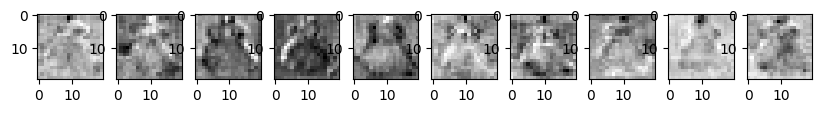

->78번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 527ms/step


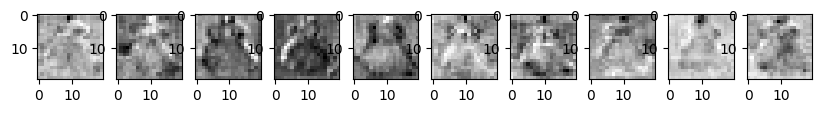

->79번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 905ms/step


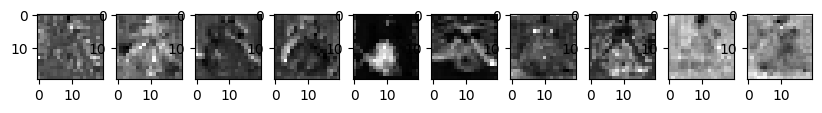

->80번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 563ms/step


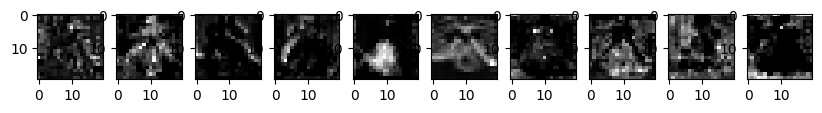

->81번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 592ms/step


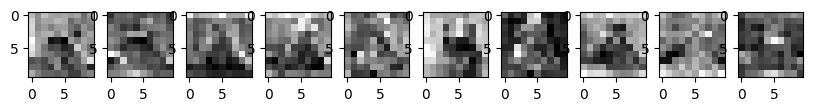

In [ ]:
###  반응이 어느정도 있을것으로 예상되는 2/3 지점정도를 예상해봄
for i in range(70,82):  ## 80번째부터 보이지 않음
  print('->{0}번째 layer를 통과하면 아래와같이 결과물 output됨'.format(i))
  check_feature(i, newimg)

## [8] 전이학습 모델 제작

In [35]:
#############################
### 위에서 80번째 레이어까지를 사용하기로 결정하였지만 일단은 기본 전이학습 모델로 작업하고자함.
### 이작업에서 차트까지 그리고난뒤에 파인튜닝은 그다음에 진행하고자 함.
### 전체 모델을 구성하고자 함
################################


IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.resnet50.ResNet50(input_shape=IMG_SHAPE,
                                                    include_top=False,
                                                    weights='imagenet')
###############

base_model.trainable = False
preprocess_input = tf.keras.applications.resnet50.preprocess_input     # 255로 나누는 작업임
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(3, activation='softmax')    ### 3은 현재 len(class_names)로 해도 됨


####################
# 모델 정의
##################

inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)  # 데이터 증강
x = preprocess_input(x) # 전처리
x = base_model_2(x, training=False) # MobileNet V2d의 basemodel


# x = tf.keras.layers.Dropout(0.2)(x)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)  # output layer
model = tf.keras.Model(inputs, outputs)


base_learning_rate = 0.0001  # 학습률 지정
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
initial_epochs = 2            # 
# 12

# 러닝레이트의 비율을 유동적으로 변화할 수 있도록 설정함
def scheduler(epoch, learning_rate):
    if epoch < 5:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1)
lr_scheduler_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)


#####################
## 현재모델은 마지막 값만 기억함으로  각 에포크마다 모델을 save할지
## 가장 좋은 모델만 저장할지
## 그리고 모델의 값이 일정한 횟수만큼 나아지지 않으면 모델을 중단할지를 더 결정해야함
############################
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset,
                    callbacks=[lr_scheduler_cb])

Epoch 1/2
30/39 ━━━━━━━━━━━━━━━━━━━━ 1:06 7s/step - accuracy: 0.4319 - loss: 1.1311

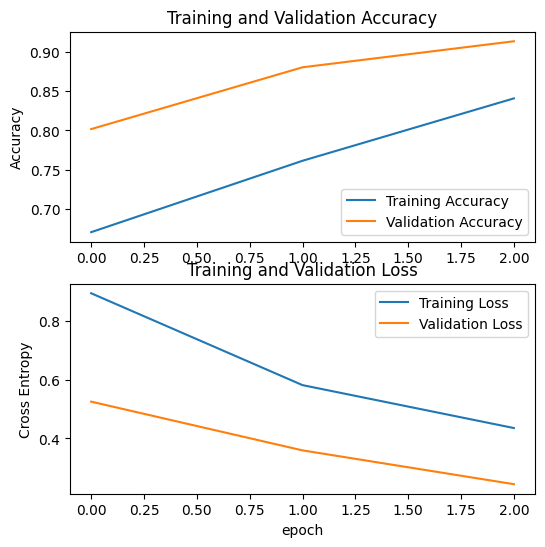

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## [9] Fine Tuning
-출력층 및 출력층에 가까운 부분뿐만 아니라 모든 층의 파라미터 다시 학습

In [ ]:
#######################
##  시각화를 통해서 80번쨰 레이어의 값만 사용하기로 결정
######################
base_model.trainable = True # 고정 해제

# 동결 층 지정
fine_tune_at = 80


# 80이상의 층은 동결시키고 훈련을 다시 시작함
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

# 사전 훈련된 가중치를 다시 조정하고 과대적합 방지를 위해 더 낮은 학습률을 사용함
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

fine_tune_epochs = 3     # 시간문제상 3번만 돌린결과이나 여러분은 상황에 따라 10번이상 돌리세요, 현재모델은 마지막만 기억합니다.
total_epochs =  initial_epochs + fine_tune_epochs

#####################
## 현재모델은 마지막 값만 기억함으로  각 에포크마다 모델을 save할지
## 가장 좋은 모델만 저장할지
## 그리고 모델의 값이 일정한 횟수만큼 나아지지 않으면 모델을 중단할지를 더 결정해야함
############################


history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)



Epoch 3/6
39/39 [==============================] - 152s 4s/step - loss: 0.3443 - accuracy: 0.8644 - val_loss: 0.2534 - val_accuracy: 0.9215
Epoch 4/6
39/39 [==============================] - 152s 4s/step - loss: 0.3502 - accuracy: 0.8750 - val_loss: 0.2517 - val_accuracy: 0.9050
Epoch 5/6
39/39 [==============================] - 186s 5s/step - loss: 0.3361 - accuracy: 0.8725 - val_loss: 0.2560 - val_accuracy: 0.9174
Epoch 6/6
39/39 [==============================] - 167s 4s/step - loss: 0.3084 - accuracy: 0.8889 - val_loss: 0.2119 - val_accuracy: 0.9215


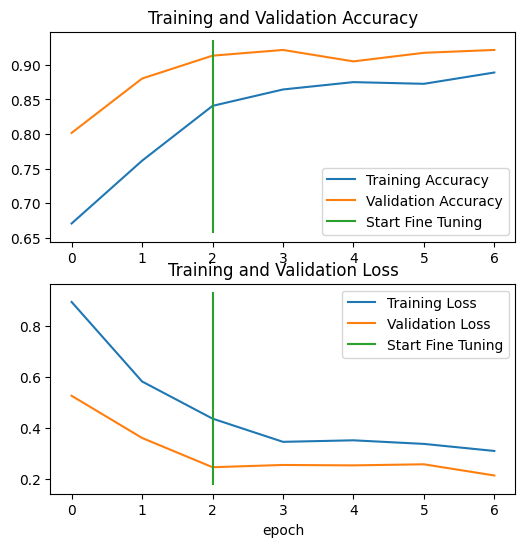

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
# plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
# plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## [10] Predict & Evaluation
- 결과값의 0,1,2 에 해당하는 값과, 예측값을 softmax하여서 0,1,2의 원핫인코딩한후 값의 일치율을 %화하여서 보여줌
- 그러나 이 값보다 중요한건 정밀도, 재현율, F1 스코어의 항목별 맞춤 정도가 중요함

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

2/2 [==============================] - 7s 4s/step - loss: 0.2717 - accuracy: 0.8750
Test accuracy : 0.875


- 테스트자료 예측 test자료가 파일형태로 분리되어서 있을때는 폴더에 있는 2번자료 형태로 해도되나(car)
-  지금과 같이 한개의 자료에서 train과 test자료로 자동 분리될때는  아래의 방법을 사용해야함


tf.Tensor([0.2200561  0.5658824  0.21406144], shape=(3,), dtype=float32)

▶가장큰번호는->1
▶인공지능이 예측한 값은->red_shoes
▶인공지능이 예측한 확률은 ->0.5658823847770691


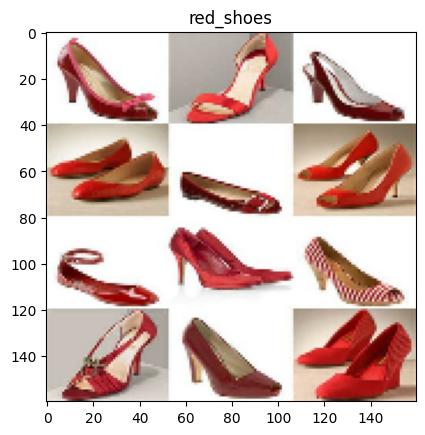

In [ ]:


###################################
### 샘플로 첫사진만 봄
### iterator().next() 는 첫번째 데이터셋이라는 뜻
### 샘플로 볼때 사용하기에좋은 코드임
### 한세트가 32개로 구성되어 있음
### ctrl+Enter 실행할때마다 다른 결과가 나옴. (validation_dataset 자료를 계속 랜덤하게 부름)
#############################

image_batch, label_batch = validation_dataset.as_numpy_iterator().next()

########### 32개의 사진중 [0]첫번째 자료만 보기
plt.imshow(image_batch[0].astype('uint8'))   #첫번째사진 만 봄
plt.title(class_names[label_batch[0]])


predictions = model.predict_on_batch(image_batch)
predictions=tf.nn.softmax(predictions[0])

print(predictions)
predBun=np.argmax(predictions)


print('\n▶가장큰번호는->{0}'.format(predBun))
print('▶인공지능이 예측한 값은->{0}'.format(class_names[predBun]))
print('▶인공지능이 예측한 확률은 ->{0}'.format(predictions[predBun]))


In [ ]:
class_names   # 1값은 red_shose 임

['red_dress', 'red_shoes', 'white_shorts']

In [ ]:
############################
### 모델에 테스트 자료 적용
############################

testPredict=model.predict(validation_dataset)

8/8 [==============================] - 28s 3s/step


In [ ]:
##########################
### iterator().next() 는 첫번째 데이터셋이라는 뜻
### 샘플로 볼때 사용하기에좋은 코드임
### 한세트가 32개로 구성되어 있음
### ctrl+Enter 실행할때마다 다른 결과가 나옴. (validation_dataset 자료를 계속 랜덤하게 부름)
#############################

image_batch, label_batch = validation_dataset.as_numpy_iterator().next()
predictions = model.predict(image_batch) #32개의 세트자료임
predictions=tf.nn.softmax(predictions)
predBun=np.argmax(predictions,1)

print('▶--실제값')
print(label_batch)

print('\n-- 예측값')
print(predBun)

1/1 [==============================] - 4s 4s/step
▶--실제값
[0 0 1 1 0 1 1 1 1 0 2 0 0 2 1 1 1 1 1 1 1 1 0 0 0 0 0 2 0 0 0 2]

-- 예측값
[0 0 1 1 0 1 1 1 1 0 2 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 2 0 0 0 2]


In [ ]:
################################
### 예상율이 0.5 보다 작으면 빨간색으로  (임계값은 사용자가 알아서 정함)
## 타이틀 출력
################################

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 30))
image_batch, label_batch = validation_dataset.as_numpy_iterator().next()
predictions = model.predict(image_batch)
predictions=tf.nn.softmax(predictions)
predBun=np.argmax(predictions,1)

i=1
for x,y,pred in zip(image_batch, label_batch,predBun):
    ax=plt.subplot(8, 5, i + 1)
    plt.imshow(x.astype('uint8'))
    predRatio=predictions[i-1,pred]

    color = "green" if predRatio>0.5 else "red"
    plt.title(f'{class_names[pred]} \n {predRatio}', color=color)
    i+=1
    plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
model.save('fashion.h5')   # 드라이브 마운트 안한상태라면 임시폴더에 있음으로 다운로드 받아야함

# [11] 분류리포트 출력(Confusion Matrix)
- 정밀도 와 재현율중 어떤 부분에 집중할 것인가는 사용자가 이 프로젝트 목적에 따라 정해야함.

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

image_batch, label_batch = validation_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)
predBun=np.argmax(predictions, axis=-1)

conMatrix = confusion_matrix(predBun, label_batch.astype(float))
conMatrix

array([[20,  1,  0],
       [ 0,  9,  0],
       [ 0,  0,  2]])

In [ ]:
cnt=len(conMatrix)
pd.DataFrame(conMatrix,
             index=['true_%d' % i for i in range(cnt)],
             columns=['pred_%d' % i for i in range(cnt)] )

,pred_0,pred_1,pred_2
true_0,20,1,0
true_1,0,9,0
true_2,0,0,2


Text(8.222222222222223, 0.5, 'true label')

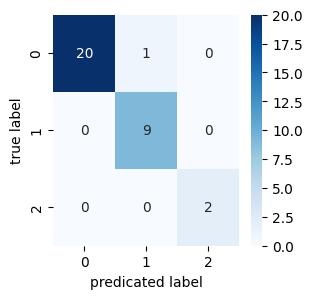

In [ ]:
import seaborn as sns
plt.figure(figsize=(3,3))
sns.heatmap(conMatrix,annot=True, fmt='d',cmap='Blues')
plt.xlabel('predicated label')
plt.ylabel('true label')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(label_batch, predBun, target_names=class_names))

              precision    recall  f1-score   support

   red_dress       0.95      1.00      0.98        20
   red_shoes       1.00      0.90      0.95        10
white_shorts       1.00      1.00      1.00         2

    accuracy                           0.97        32
   macro avg       0.98      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32

